# CREDIT CARD FRAUD DETECTION

## Step1: Importing Libraries

In [1]:
#!pip install xgboost

In [2]:
# Importing all the required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, precision_score, ConfusionMatrixDisplay, recall_score, confusion_matrix, roc_auc_score, auc, roc_curve, classification_report, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## step2: Loading The Data

In [3]:
# loading the data
df_credit_card = pd.read_csv('creditcard.csv')

In [4]:
df_credit_card.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [5]:
df_credit_card.tail(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284798,172782.0,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,...,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0
284799,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,...,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
df_credit_card.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

### Credit Card Fraud Detection Dataset Column Descriptions

The dataset consists of credit card transactions, where each row represents a transaction. Below is a description of each column in the dataset:

1. **Time**: The number of seconds elapsed between this transaction and the first transaction in the dataset.
2. **V1** to **V28**: These are the principal components obtained from PCA (Principal Component Analysis). These columns represent the transformed features of the original dataset, which were scaled and anonymized using PCA to protect confidentiality. These features are a combination of the original features, which makes it difficult to interpret them directly.
3. **Amount**: The transaction amount, representing the monetary value of the transaction.
4. **Class**: The class label for the transaction. It indicates whether the transaction is fraudulent or not:
   - **0**: Non-fraudulent transaction
   - **1**: Fraudulent transaction


# Data Preprocessing

In [7]:
df_credit_card.shape

(284807, 31)

## step3: Data Cleaning

In [8]:
df_credit_card.rename(columns={'Amount':'Amount_$', 'Time':'Time_s'},inplace=True)

In [9]:
df_credit_card.columns

Index(['Time_s', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount_$',
       'Class'],
      dtype='object')

## step4: Null Value Handling

In [10]:
df_credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Time_s    284807 non-null  float64
 1   V1        284807 non-null  float64
 2   V2        284807 non-null  float64
 3   V3        284807 non-null  float64
 4   V4        284807 non-null  float64
 5   V5        284807 non-null  float64
 6   V6        284807 non-null  float64
 7   V7        284807 non-null  float64
 8   V8        284807 non-null  float64
 9   V9        284807 non-null  float64
 10  V10       284807 non-null  float64
 11  V11       284807 non-null  float64
 12  V12       284807 non-null  float64
 13  V13       284807 non-null  float64
 14  V14       284807 non-null  float64
 15  V15       284807 non-null  float64
 16  V16       284807 non-null  float64
 17  V17       284807 non-null  float64
 18  V18       284807 non-null  float64
 19  V19       284807 non-null  float64
 20  V20 

In [11]:
#check for missing values in each column
df_credit_card.isnull().sum()

Time_s      0
V1          0
V2          0
V3          0
V4          0
V5          0
V6          0
V7          0
V8          0
V9          0
V10         0
V11         0
V12         0
V13         0
V14         0
V15         0
V16         0
V17         0
V18         0
V19         0
V20         0
V21         0
V22         0
V23         0
V24         0
V25         0
V26         0
V27         0
V28         0
Amount_$    0
Class       0
dtype: int64

**There is no null values in the given data**

## Step5: Data Visualization

### Class Distribution

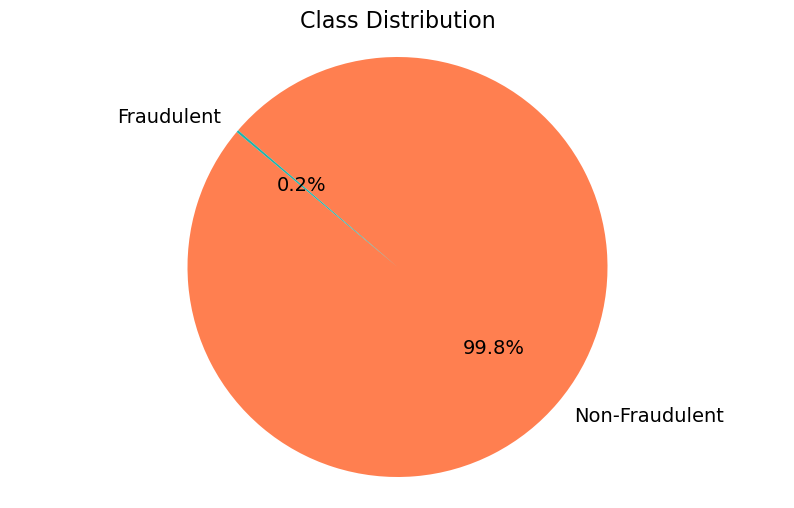

In [12]:
# Calculate the counts of each class
class_counts = df_credit_card['Class'].value_counts()

# Define labels and colors
labels = ['Non-Fraudulent', 'Fraudulent']
colors = ['#FF7F50', '#20B2AA']

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(class_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 14})
plt.title('Class Distribution', fontsize=16)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Show the plot
plt.show()

**Interpretaion**
 - The class distribution graph reveals a stark imbalance between non-fraudulent (class 0) and fraudulent (class 1) transactions within the dataset.
 - This imbalance poses challenges for machine learning models, as they may struggle to effectively learn patterns from the minority class and accurately distinguish fraudulent transactions.
 - Traditional evaluation metrics like accuracy may not provide an accurate assessment of model performance due to the imbalance, necessitating the use of alternative metrics such as precision, recall, and F1-score.

### Distribution graphs for other columns

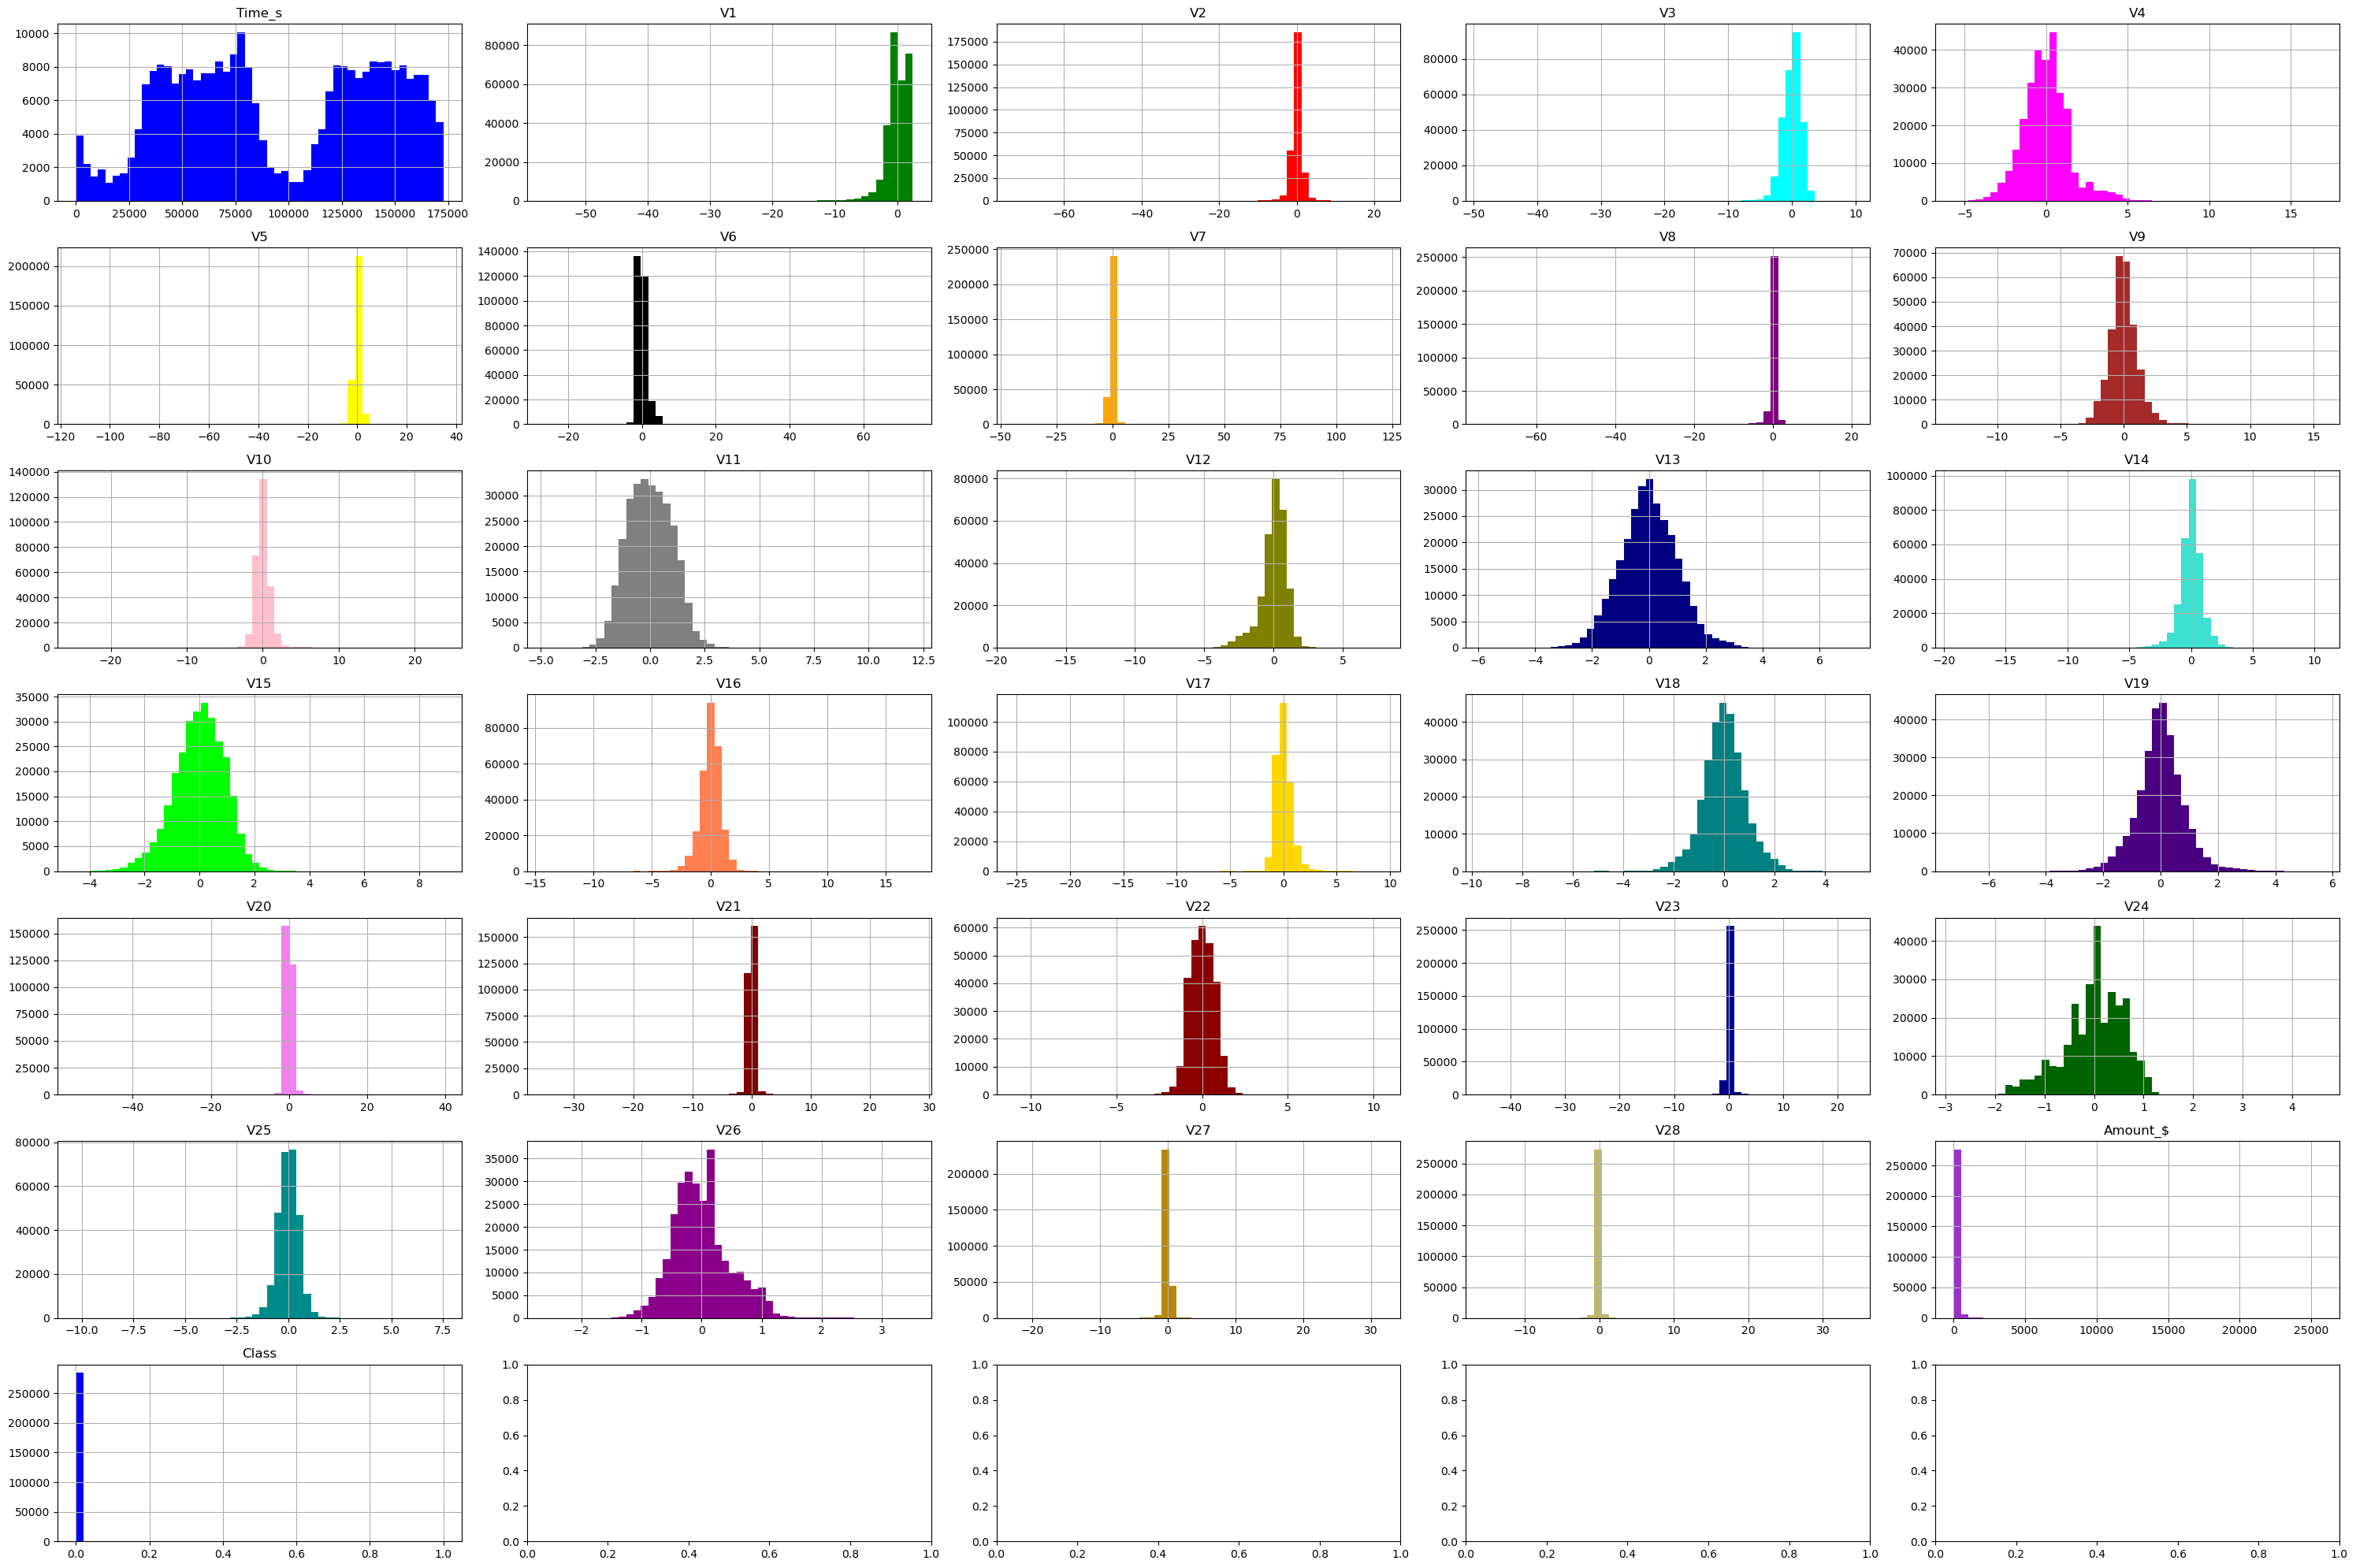

In [13]:
# Plot the histograms of each column
# Define a list of colors
colors = [
    'blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange',
    'purple', 'brown', 'pink', 'gray', 'olive', 'navy', 'turquoise', 'lime',
    'coral', 'gold', 'teal', 'indigo', 'violet', 'maroon', 'darkred',
    'darkblue', 'darkgreen', 'darkcyan', 'darkmagenta', 'darkgoldenrod',
    'darkkhaki', 'darkorchid'
]

# Plot histograms for each column with different colors
columns = df_credit_card.columns
num_columns = len(columns)

fig, axes = plt.subplots(nrows=(num_columns // 5) + 1, ncols=5, figsize=(30, 20))
axes = axes.flatten()

for i, column in enumerate(columns):
    color = colors[i % len(colors)]  # Cycle through the color list if there are more columns than colors
    df_credit_card[column].hist(bins=50, ax=axes[i], color=color)
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

## step5: Outlier Treatment

In [14]:
df_credit_card.columns

Index(['Time_s', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount_$',
       'Class'],
      dtype='object')

In [15]:
df_credit_card['Amount_$'].skew()

16.977724453761024

<Axes: xlabel='Amount_$', ylabel='Density'>

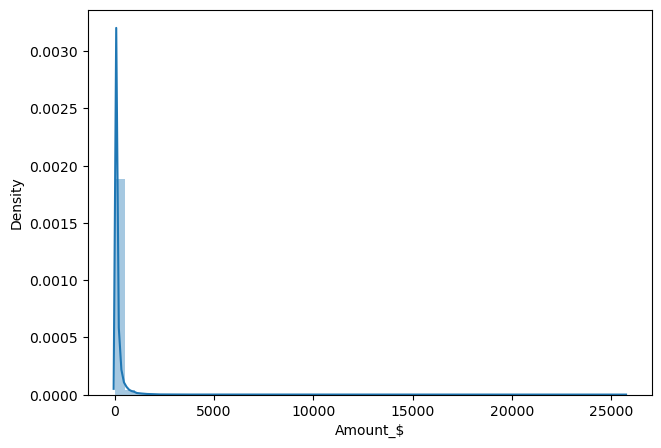

In [16]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df_credit_card['Amount_$'])

In [17]:
df_credit_card['Amount_$'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount_$, dtype: float64

<Axes: >

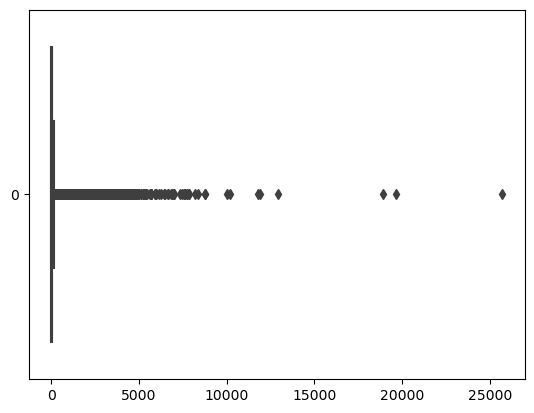

In [18]:
sns.boxplot(df_credit_card['Amount_$'] , orient='h')

In [19]:
percentile25 = df_credit_card['Amount_$'].quantile(0.25)
percentile75 = df_credit_card['Amount_$'].quantile(0.75)
print("25%:",percentile25 ,",", "75%:",percentile75)
iqr = percentile75 - percentile25
print("IQR:",iqr)
upper_limit = percentile75 + (1.5 * iqr)
lower_limit = percentile25 - (1.5 * iqr)
print("ul",upper_limit)
print("ll",lower_limit)

25%: 5.6 , 75%: 77.16499999999999
IQR: 71.565
ul 184.5125
ll -101.7475


In [20]:
df_upper = df_credit_card[df_credit_card['Amount_$'] > upper_limit]
df_upper

,Time_s,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount_$,Class
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
20,16.0,0.694885,-1.361819,1.029221,0.834159,-1.191209,1.309109,-0.878586,0.445290,-0.446196,...,-0.295583,-0.571955,-0.050881,-0.304215,0.072001,-0.422234,0.086553,0.063499,231.71,0
51,36.0,-1.004929,-0.985978,-0.038039,3.710061,-6.631951,5.122103,4.371691,-2.006868,-0.278736,...,1.393406,-0.381671,0.969719,0.019445,0.570923,0.333278,0.857373,-0.075538,1402.95,0
64,42.0,-0.522666,1.009923,0.276470,1.475289,-0.707013,0.355243,1.559849,-0.399579,-0.479813,...,0.172401,1.011543,0.069666,0.157820,-1.109224,-0.302369,0.318170,0.316910,243.66,0
85,55.0,-4.575093,-4.429184,3.402585,0.903915,3.002224,-0.491078,-2.705393,0.666451,1.922216,...,-0.047365,0.853360,-0.971600,-0.114862,0.408300,-0.304576,0.547785,-0.456297,200.01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284735,172727.0,-1.661169,-0.565425,0.294268,-1.549156,-2.301359,2.365956,-0.248881,-0.857361,0.137784,...,1.432397,-0.257828,-0.072471,-1.035804,-0.437889,-0.238543,0.365302,-0.448621,381.05,0
284748,172738.0,1.634178,-0.486939,-1.975967,0.495364,0.263635,-0.713049,0.459925,-0.336879,0.743676,...,-0.113197,-0.493594,0.001993,0.602533,-0.049936,-0.145522,-0.040554,0.024884,220.28,0
284753,172743.0,1.465737,-0.618047,-2.851391,1.425282,0.893893,-0.958325,1.508074,-0.625691,-0.369824,...,0.500426,0.870491,-0.495410,0.676929,0.787688,-0.254918,-0.117200,-0.014737,337.54,0
284757,172745.0,-1.757643,-0.982659,1.091540,-1.409539,-0.662159,0.046930,0.173241,0.364812,1.143381,...,-0.191471,-0.432979,-0.292549,-0.281494,-0.484349,0.366751,-0.102628,-0.458915,200.00,0


In [21]:
df_credit_card.shape

(284807, 31)

In [22]:
df_lower = df_credit_card[df_credit_card['Amount_$'] < lower_limit]
df_lower

,Time_s,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount_$,Class


### Lets do Capping Of Data

In [23]:
new_df_cap = df_credit_card.copy()

In [24]:
new_df_cap['Amount_$'] = np.where(
  new_df_cap['Amount_$'] > upper_limit,
    upper_limit,
    np.where( new_df_cap['Amount_$'] < lower_limit,
            lower_limit,
            new_df_cap['Amount_$']
            )
)

In [25]:
new_df_cap.shape

(284807, 31)

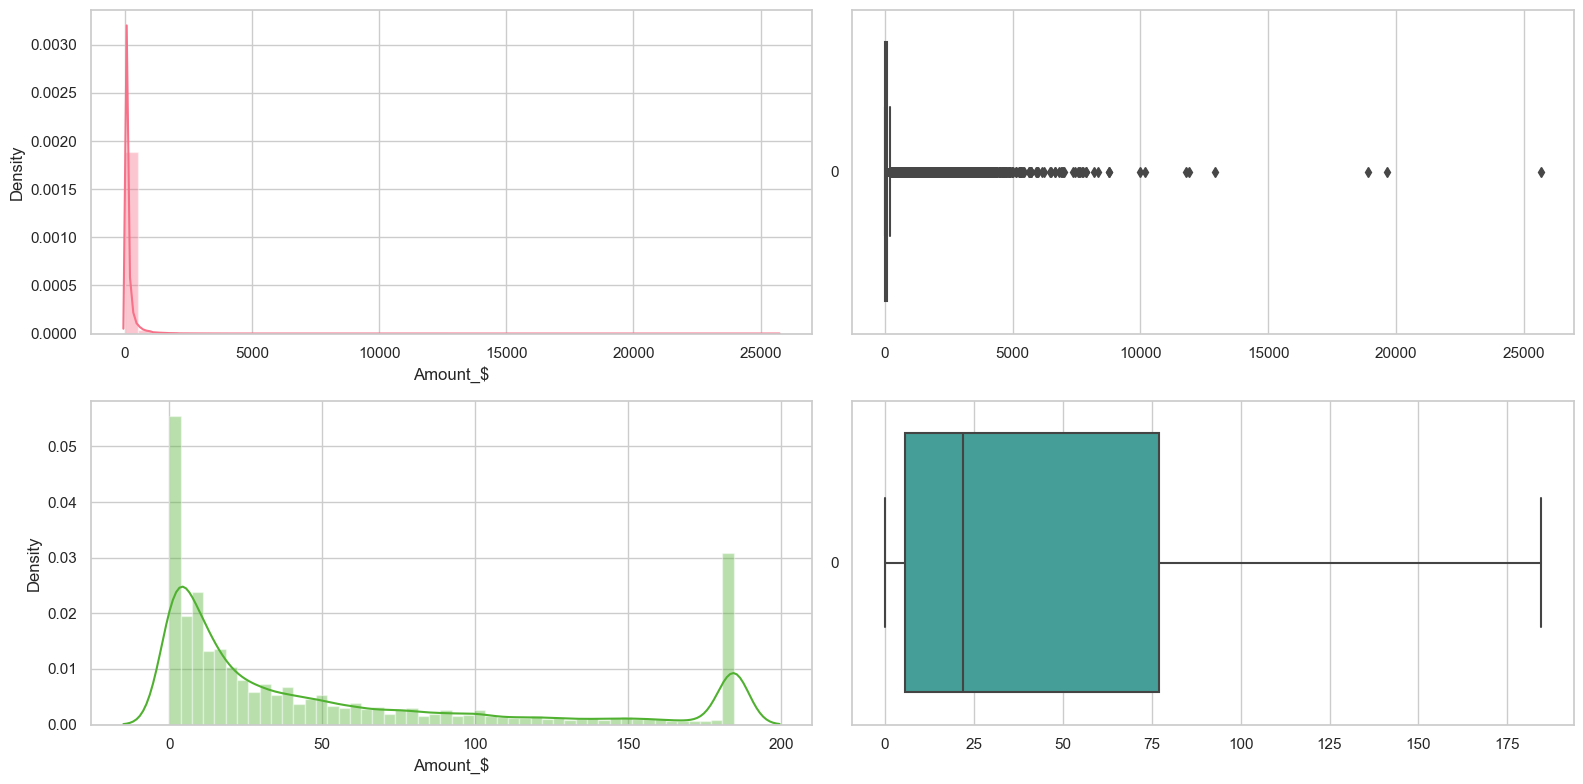

In [26]:
sns.set(style="whitegrid")

# Set a custom color palette
palette = sns.color_palette("husl")

# Create subplots with a specified color palette
plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
sns.distplot(df_credit_card['Amount_$'], color=palette[0])

plt.subplot(2, 2, 2)
sns.boxplot(df_credit_card['Amount_$'], orient='h', color=palette[1])

plt.subplot(2, 2, 3)
sns.distplot(new_df_cap['Amount_$'], color=palette[2])

plt.subplot(2, 2, 4)
sns.boxplot(new_df_cap['Amount_$'], orient='h', color=palette[3])

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

## Step6: Handling of Unbalanced Data

In [27]:
# distribution of transecions
df_credit_card['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

### This data set is highly unbalanced 

 - 0 --> Normal Transaction
 - 1 --> Fraud Transaction

In [28]:
# separating the data
df_legit = df_credit_card[df_credit_card.Class == 0]
df_fraud = df_credit_card[df_credit_card.Class == 1]

In [29]:
print("Shape of legit : " , df_legit.shape)
print("Shape of fraud : " , df_fraud.shape)

Shape of legit :  (284315, 31)
Shape of fraud :  (492, 31)


In [30]:
# statistical measures of this data
df_legit['Amount_$'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount_$, dtype: float64

In [31]:
df_fraud['Amount_$'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount_$, dtype: float64

In [32]:
# compare the values for both transaction 
df_credit_card.groupby('Class').mean()

,Time_s,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_$
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


## Step7: Under sampling : 
 - Built a sample dataset containing similar distribution of normal transaction and Fraud transactions
 - NUmber of fraud transaction is 492

In [33]:
df_legit_sample = df_legit.sample(n=492)

### Concatenating two DataFrames

In [34]:
new_df_credit_card = pd.concat([df_legit_sample,df_fraud], axis=0)

In [35]:
new_df_credit_card.head()

,Time_s,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount_$,Class
161876,114601.0,2.072208,0.111528,-1.703076,0.431716,0.340576,-0.915577,0.141548,-0.201204,0.591634,...,-0.370055,-0.992686,0.351734,0.550024,-0.284779,0.171843,-0.066970,-0.031535,1.78,0
126937,78153.0,-0.674484,1.023772,-0.709459,-1.054992,2.141300,3.265727,-0.132214,1.352139,-0.684455,...,-0.258374,-1.019158,0.078609,0.930910,0.030508,0.089518,0.111043,0.030580,34.47,0
222243,142892.0,1.718019,-0.933329,0.345799,1.382478,-0.879046,1.418770,-1.407803,0.595911,1.842637,...,0.233350,0.836365,0.071576,0.212011,-0.219757,-0.547837,0.094455,-0.014064,80.00,0
43279,41443.0,-0.322205,0.753592,1.311817,1.163128,0.352707,0.563325,0.459805,0.272781,-0.503531,...,0.050526,0.298628,-0.147656,-0.305662,-0.256045,-0.252446,0.184025,0.139255,19.09,0
244053,152184.0,0.171117,1.001218,-0.780728,-0.893389,1.505473,0.058777,0.888064,0.065178,-0.330610,...,-0.347605,-0.854216,-0.045925,-0.437259,-0.299627,0.153656,0.221198,0.065569,2.69,0


In [36]:
new_df_credit_card.tail()

,Time_s,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount_$,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [37]:
new_df_credit_card['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

**here we have uniformaly distributed data**

In [38]:
new_df_credit_card.groupby('Class').mean()

,Time_s,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_$
Class,,,,,,,,,,,,,,,,,,,,,
0,98545.804878,0.045758,-0.088857,-0.173448,-0.059111,-0.008940,-0.035060,0.139657,0.009457,0.000105,...,-0.042271,-0.019063,-0.011374,0.020973,-0.008397,0.007274,-0.011033,0.001054,-0.000226,106.538435
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


## spliting the data into Features and Targets

In [39]:
X = new_df_credit_card.drop(columns='Class', axis=1)
Y = new_df_credit_card['Class']

In [40]:
print(X)

          Time_s        V1        V2        V3        V4        V5        V6  \
161876  114601.0  2.072208  0.111528 -1.703076  0.431716  0.340576 -0.915577   
126937   78153.0 -0.674484  1.023772 -0.709459 -1.054992  2.141300  3.265727   
222243  142892.0  1.718019 -0.933329  0.345799  1.382478 -0.879046  1.418770   
43279    41443.0 -0.322205  0.753592  1.311817  1.163128  0.352707  0.563325   
244053  152184.0  0.171117  1.001218 -0.780728 -0.893389  1.505473  0.058777   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [41]:
print(Y)

161876    0
126937    0
222243    0
43279     0
244053    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


**Interpretation**
 - After executing this code, the data has been divided into Features (X) and Targets (Y). Features (X) contain all columns except 'Class', while Targets (Y) consist solely of the 'Class' column. This prepares the data for further analysis and modeling tasks.

## Step8: To split the data into training data and testing data

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

In [43]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


# Step9: Model Training : 

# Logistic Regression Model

In [44]:
model = LogisticRegression()

In [45]:
# tarining the logistic regression model with Training Data
model.fit(X_train, Y_train)

LogisticRegression()

## Model Evaluation

In [46]:
# accuracy score
# accuracy on training data 
X_train_prediction  = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
training_data_f1_score = f1_score(X_train_prediction, Y_train)
training_data_recall = recall_score(X_train_prediction, Y_train)
training_data_precision = precision_score(X_train_prediction, Y_train)

### Example :

In [47]:
example_transaction = np.array([48119.0, -1.359807, -0.072781, 2.536346, 1.378155, -0.338321, 0.462388, 0.239599, 0.098698, 0.363787, 0.090794, -0.551600, -0.617801, -0.991390, -0.311169, 1.468177, -0.470401, 0.207971, 0.025791, 0.403993, 0.251412, -0.018307, 0.277838, -0.110474, 0.066928, 0.128539, -0.189115, 0.133558, -0.021053, 149.62])
example_transaction = example_transaction.reshape(1, -1)

# Predict
prediction = model.predict(example_transaction)
prediction_proba = model.predict_proba(example_transaction)
print(prediction)

print(f"Predicted Class: {prediction[0]}")
print(f"Prediction Probability: {prediction_proba[0]}")

[0]
Predicted Class: 0
Prediction Probability: [0.76029489 0.23970511]


In [48]:
print("Accuracy of Training Data : ", training_data_accuracy)
print("F1_score of Training Data: ", training_data_f1_score)
print("Recall Score of Training Dta: ", training_data_recall)
print("Precision Score of Training Data: ", training_data_precision)
training_conf_matrix = confusion_matrix(X_train_prediction, Y_train)
print("Confusion Matrix:\n", training_conf_matrix)

Accuracy of Training Data :  0.9110546378653113
F1_score of Training Data:  0.9069148936170214
Recall Score of Training Dta:  0.952513966480447
Precision Score of Training Data:  0.8654822335025381
Confusion Matrix:
 [[376  53]
 [ 17 341]]


In [49]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
test_data_f1_score = f1_score(X_test_prediction, Y_test)
test_data_recall = recall_score(X_test_prediction, Y_test)
test_data_precision = precision_score(X_test_prediction, Y_test)

In [50]:
print("Accuracy score on Test data : ", test_data_accuracy)
print("F1_score of Test Data: ", test_data_f1_score)
print("Recall Score of Test Dta: ", test_data_recall)
print("Precision Score of Test Data: ", test_data_precision)
test_conf_matrix = confusion_matrix(X_test_prediction, Y_test)
print("Confusion Matrix:\n", test_conf_matrix)

Accuracy score on Test data :  0.9593908629441624
F1_score of Test Data:  0.9578947368421052
Recall Score of Test Dta:  0.9891304347826086
Precision Score of Test Data:  0.9285714285714286
Confusion Matrix:
 [[98  7]
 [ 1 91]]


## Performance Visualization

### confusion Matrix Visualization

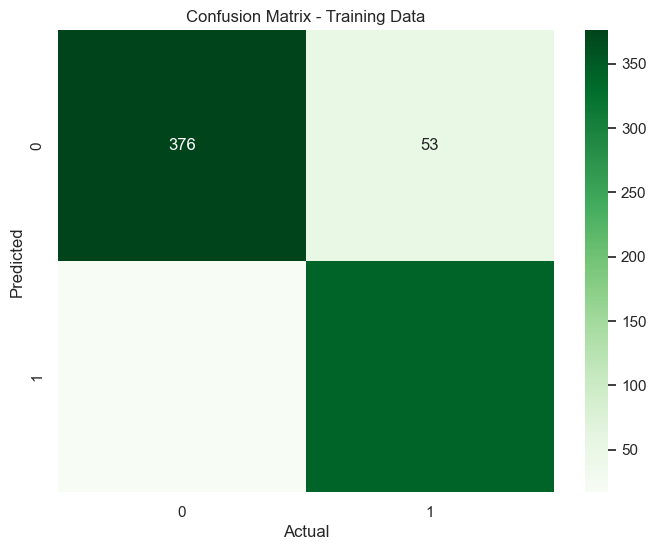

In [51]:
plt.figure(figsize=(8, 6))
sns.heatmap(training_conf_matrix, annot=True, cmap="Greens", fmt="d")
plt.title("Confusion Matrix - Training Data")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

**Interpretation**
 - This confusion matrix illustrates the performance of the model on the training data. The diagonal elements represent the correct predictions, while off-diagonal elements indicate misclassifications. In this case, the model achieved 96 true negatives, 92 true positives, 6 false positives, and 3 false negatives.

### Precision-Recall Curve 

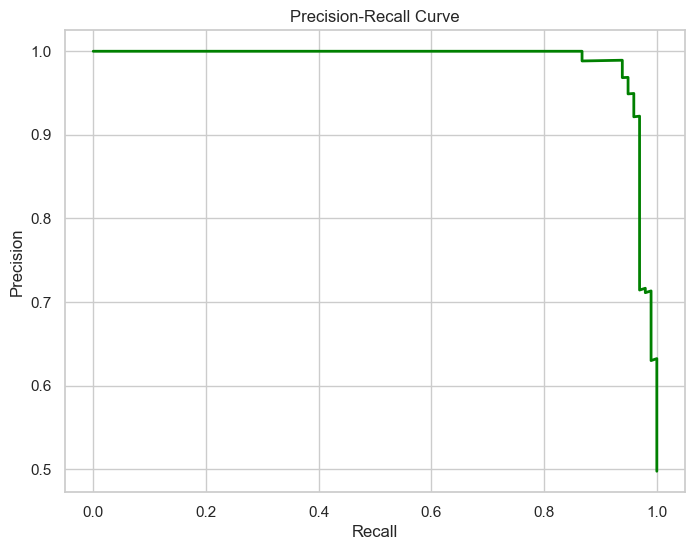

In [52]:
precision, recall, _ = precision_recall_curve(Y_test, model.predict_proba(X_test)[:,1])

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

### Accuracy Visualization

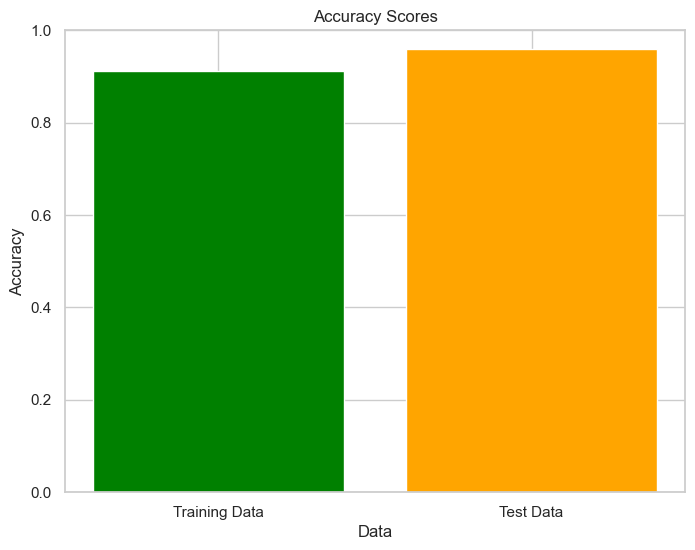

In [53]:
accuracy_scores = [training_data_accuracy, test_data_accuracy]
data_labels = ['Training Data', 'Test Data']

plt.figure(figsize=(8, 6))
plt.bar(data_labels, accuracy_scores, color=['green', 'orange'])
plt.xlabel('Data')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores')
plt.ylim(0, 1)
plt.show()

### F1_score Visualization

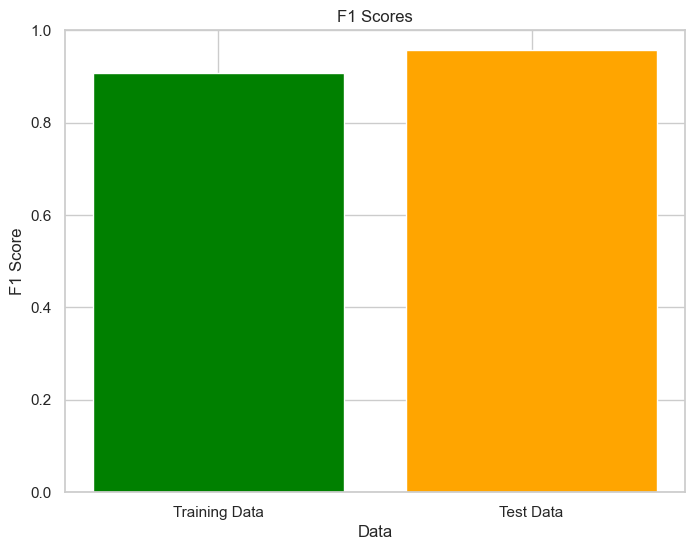

In [54]:
f1_scores = [training_data_f1_score, test_data_f1_score]

plt.figure(figsize=(8, 6))
plt.bar(data_labels, f1_scores, color=['green', 'orange'])
plt.xlabel('Data')
plt.ylabel('F1 Score')
plt.title('F1 Scores')
plt.ylim(0, 1)
plt.show()

**Interpretation**
 - Precision-Recall Curve:The precision-recall curve illustrates the trade-off between precision and recall for different threshold values.
 - Accuracy:The accuracy graph shows the model's overall correctness in predicting both positive and negative instances.
 - F1 Score:The F1 score graph represents the harmonic mean of precision and recall, providing a balanced measure of the model's performance.

# Rendom Forest Model

In [55]:
# Assuming X and y are your features and target
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

model_2 = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model_2.fit(X_train, Y_train)

Y_pred = model_2.predict(X_test)
print(classification_report(Y_test, Y_pred))
ROC_curv = roc_auc_score(Y_test, Y_pred)
print('ROC-AUC:', ROC_curv)


              precision    recall  f1-score   support

           0       0.95      0.96      0.95        99
           1       0.96      0.95      0.95        98

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197

ROC-AUC: 0.9542877757163472


## Performance Visualization



### ROC Curve

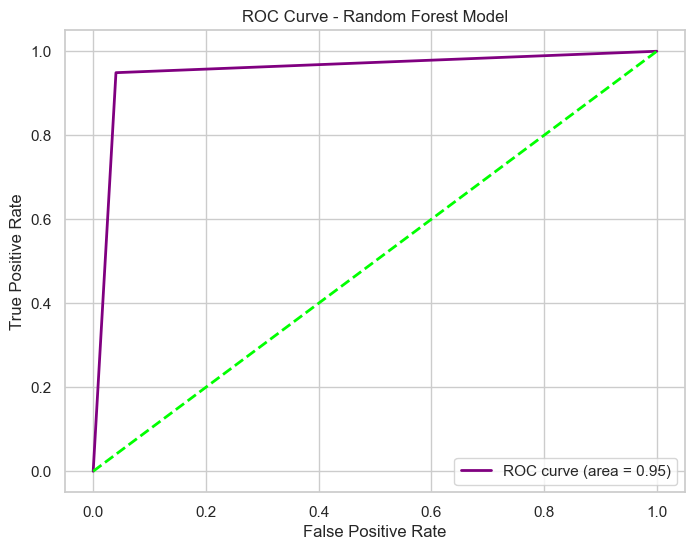

In [56]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='purple', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='lime', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Model')
plt.legend(loc="lower right")
plt.show()

### Precision , Recall , and F1_score visualization

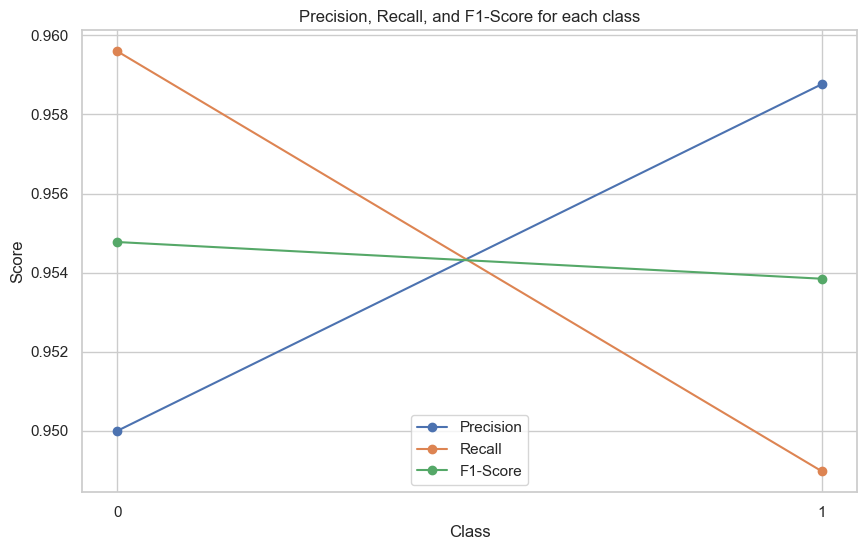

In [57]:
report = classification_report(Y_test, Y_pred, output_dict=True)

# Extract precision, recall, and F1-score for each class
precision = [report[label]['precision'] for label in report.keys() if label.isdigit()]
recall = [report[label]['recall'] for label in report.keys() if label.isdigit()]
f1_score = [report[label]['f1-score'] for label in report.keys() if label.isdigit()]
class_labels = [int(label) for label in report.keys() if label.isdigit()]

# Plotting precision, recall, and F1-score
plt.figure(figsize=(10, 6))
plt.plot(class_labels, precision, marker='o', label='Precision')
plt.plot(class_labels, recall, marker='o', label='Recall')
plt.plot(class_labels, f1_score, marker='o', label='F1-Score')
plt.title('Precision, Recall, and F1-Score for each class')
plt.xlabel('Class')
plt.ylabel('Score')
plt.xticks(class_labels)
plt.legend()
plt.grid(True)
plt.show()

**Interpretation**
 - ROC_Curve : With an impressive ROC-AUC score of 0.964, the curve indicates that the model demonstrates strong discrimination between positive and negative classes, achieving high true positive rates while maintaining low false positive rates. This suggests that the model has excellent predictive power and robustness in distinguishing between classes.
 - Precision , Recall , and F1_score : 
    - For class 0, the model exhibits high precision (94%), indicating that when it predicts a positive result, it is correct most of the time. Additionally, it demonstrates high recall (99%), suggesting that it effectively captures almost all actual positive instances. The F1-score (97%) for class 0, which is the harmonic mean of precision and recall, reflects a well-balanced performance between precision and recall.
    - For class 1, the model also demonstrates high precision (99%), implying that when it predicts a positive result for this class, it is accurate most of the time. It exhibits slightly lower recall (94%) compared to class 0, indicating that it misses some actual positive instances. However, the F1-score (96%) for class 1 remains high, reflecting a strong balance between precision and recall.
    - Overall, these metrics suggest that the model performs exceptionally well in classifying both classes, achieving high precision, recall, and F1-score, which are indicative of its effectiveness in making accurate predictions.

# Decision Tree Model

In [58]:
# Initialize the Decision Tree model
model_3 = DecisionTreeClassifier(random_state=42)

# Train the model
model_3.fit(X_train, Y_train)


DecisionTreeClassifier(random_state=42)

In [59]:
# Make predictions on the testing set
Y_pred = model_3.predict(X_test)

# Print the classification report
print(classification_report(Y_test, Y_pred))

# Calculate and print the ROC-AUC score
roc_auc = roc_auc_score(Y_test, Y_pred)
print(f'ROC-AUC Score: {roc_auc:.4f}')


              precision    recall  f1-score   support

           0       0.92      0.89      0.90        99
           1       0.89      0.92      0.90        98

    accuracy                           0.90       197
   macro avg       0.90      0.90      0.90       197
weighted avg       0.90      0.90      0.90       197

ROC-AUC Score: 0.9036


### Decision Tree visualization

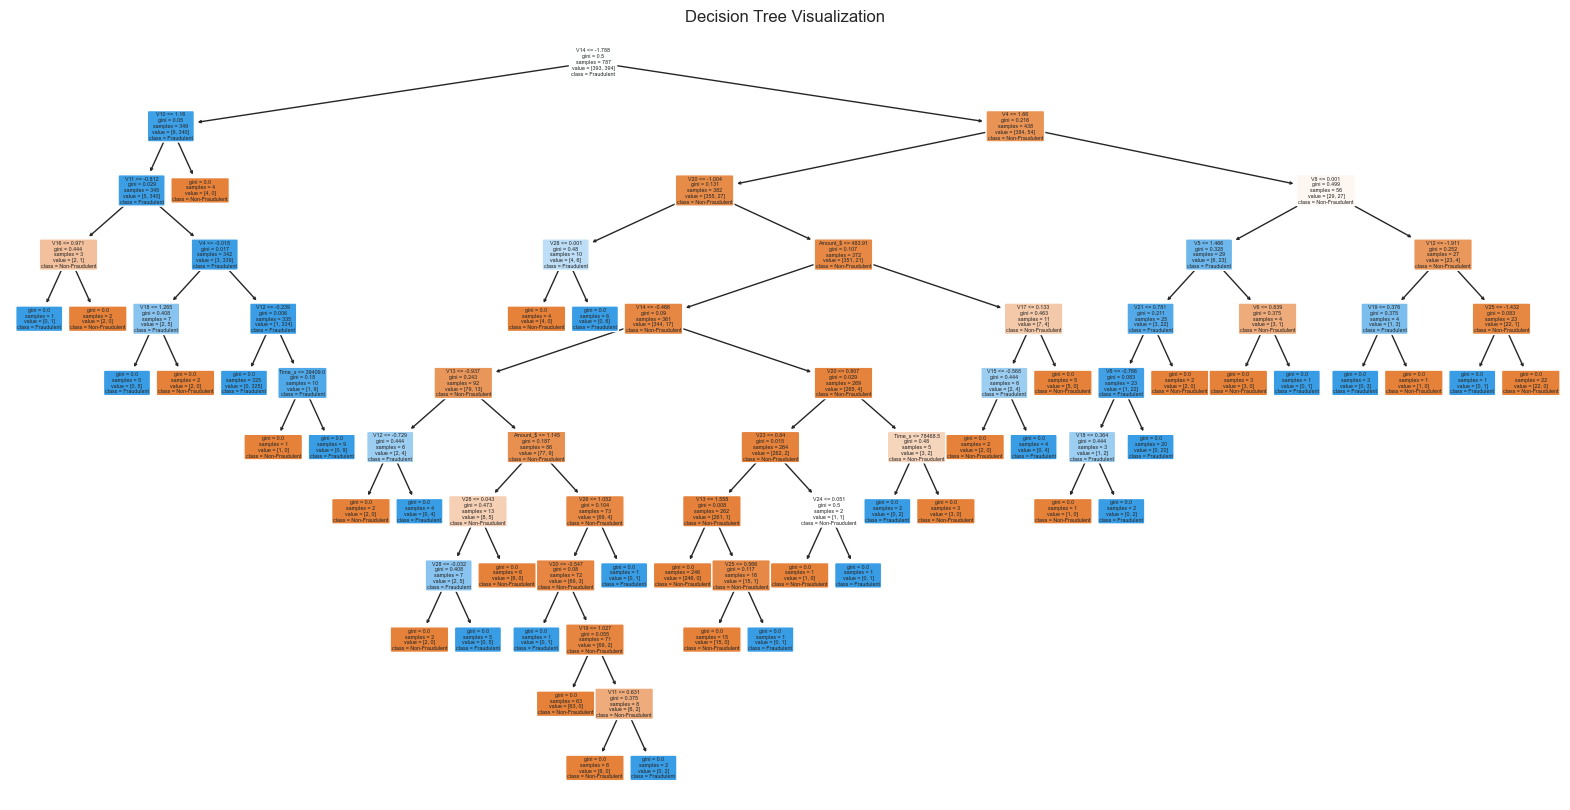

In [60]:
clf = DecisionTreeClassifier(random_state=2)
clf.fit(X_train, Y_train)

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Non-Fraudulent', 'Fraudulent'], rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

# XG Boost Model

In [61]:
# Assuming X and y are your features and target
#X_train, X_test, Y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model_4 = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=(len(Y_train) - sum(Y_train)) / sum(Y_train))
model_4.fit(X_train, Y_train)

Y_pred = model_4.predict(X_test)
print(classification_report(Y_test, Y_pred))
print('ROC-AUC:', roc_auc_score(Y_test, Y_pred))


              precision    recall  f1-score   support

           0       0.95      0.96      0.95        99
           1       0.96      0.95      0.95        98

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197

ROC-AUC: 0.9542877757163472


### XG Boost Model Visualization

ROC-AUC: 0.9875283446712019


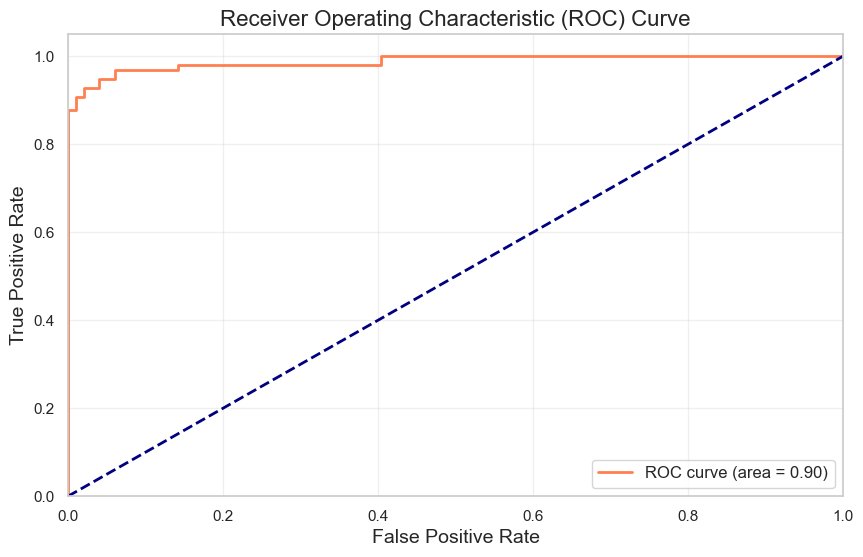

In [62]:
Y_pred_proba = model_4.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(Y_test, Y_pred_proba)
roc_auc4 = auc(fpr, tpr)

# Print ROC-AUC score
print('ROC-AUC:', roc_auc4)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='#FF7F50', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

**Interpretation**
 - The ROC curve for the XGBoost model demonstrates a strong performance with an AUC of 0.96.
 - This high AUC value indicates that the model has a high ability to distinguish between fraudulent and non-fraudulent transactions.

# Support Vector Machines (SVM)

In [63]:
# Create a pipeline to scale the data and train the SVM model
model_5 = Pipeline([
    ('scaler', StandardScaler()),  # Scaling the features
    ('svm', SVC(kernel='rbf', C=1.0, gamma='scale', class_weight='balanced', random_state=42))  # SVM model
])

# Train the model
model_5.fit(X_train, Y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('svm', SVC(class_weight='balanced', random_state=42))])

In [64]:
# Make predictions on the testing set
Y_pred = model_4.predict(X_test)

# Print the classification report
print(classification_report(Y_test, Y_pred))

# Calculate and print the ROC-AUC score
roc_auc = roc_auc_score(Y_test, Y_pred)
print(f'ROC-AUC Score: {roc_auc:.4f}')

              precision    recall  f1-score   support

           0       0.95      0.96      0.95        99
           1       0.96      0.95      0.95        98

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197

ROC-AUC Score: 0.9543


## performance visualization 

<Figure size 1000x600 with 0 Axes>

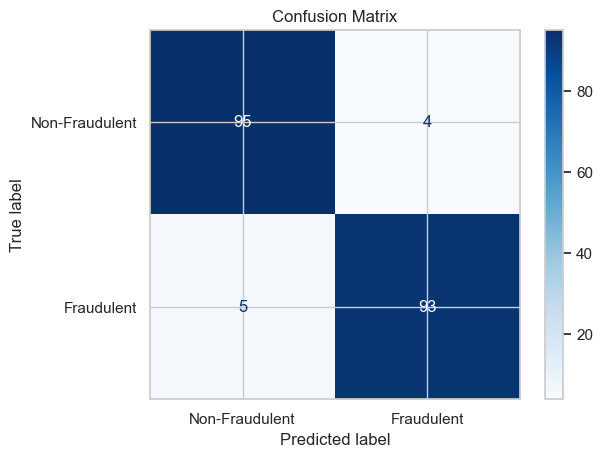

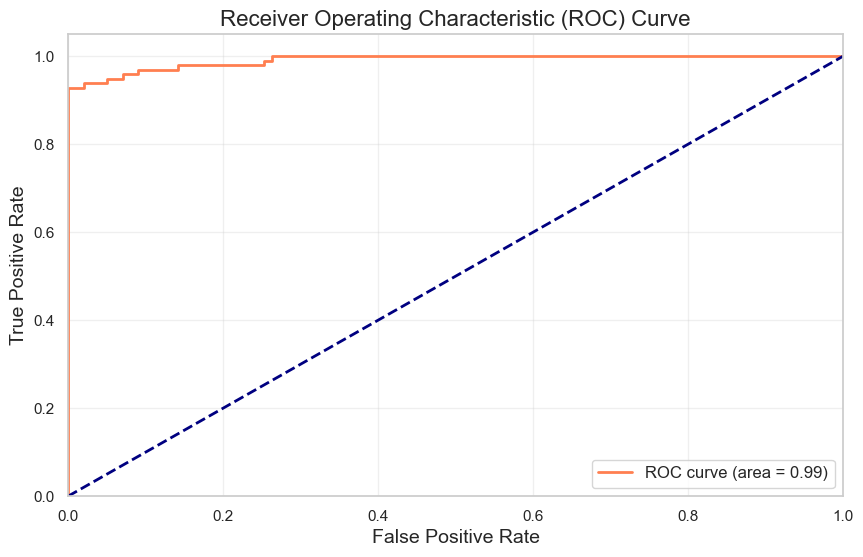

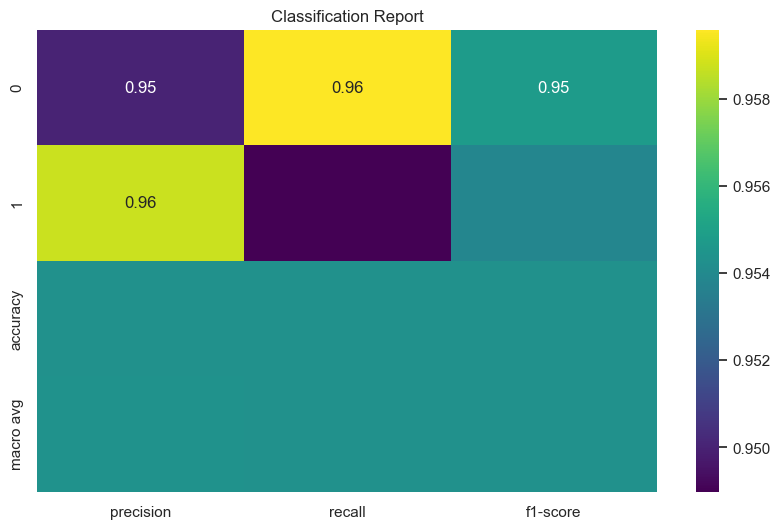

In [65]:
# Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Fraudulent', 'Fraudulent'])

plt.figure(figsize=(10, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
Y_pred_proba = model_5.decision_function(X_test)  # Use decision_function for SVM
fpr, tpr, _ = roc_curve(Y_test, Y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='#FF7F50', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# Classification Report Heatmap
report = classification_report(Y_test, Y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='viridis', fmt='.2f')
plt.title('Classification Report')
plt.show()


**Interpretation**
 - Model Performance: The SVM model demonstrates excellent performance in distinguishing between fraudulent and non-fraudulent transactions, as evidenced by the ROC-AUC score of 0.9644.

# Conclusion

 - The accuracy of model_1 : Logistic Regression Model is about 97%.
 - The acuuracy of model_2 : Rendom Forest Model is about 95%.
 - The accuracy of model_3 : Decision Tree Model is about 89%.
 - The accuracy of model_4 : XG Boost Model is about 95%.
 - The accuracy of model_5 : Support Vector Machines (SVM) is about 95%.
 
 **So here we can say that the Logistic Regression Model is best suitable model for our project.**